In [1]:
import pandas as pd

In [2]:
df = pd.read_sas('nsch_2020_topical_SAS/nsch_2020_topical.sas7bdat')

In [3]:
df.shape

(42777, 443)

In [4]:
df.head()

,FIPSST,STRATUM,HHID,FORMTYPE,TOTKIDS_R,TENURE,HHLANGUAGE,SC_AGE_YEARS,SC_SEX,K2Q35A_1_YEARS,...,BIRTH_YR_F,BMICLASS,HHCOUNT_IF,FPL_I1,FPL_I2,FPL_I3,FPL_I4,FPL_I5,FPL_I6,FWC
0,b'17',b'1',b'20000003',b'T1',2.0,1.0,1.0,3.0,1.0,NaN,...,0.0,NaN,0.0,400.0,400.0,400.0,400.0,400.0,400.0,3296.080092
1,b'29',b'2A',b'20000004',b'T3',1.0,1.0,1.0,14.0,2.0,NaN,...,0.0,2.0,0.0,400.0,400.0,400.0,400.0,400.0,400.0,2888.545330
2,b'47',b'1',b'20000005',b'T1',1.0,1.0,1.0,1.0,2.0,NaN,...,0.0,NaN,0.0,400.0,400.0,400.0,400.0,400.0,400.0,1016.682730
3,b'28',b'1',b'20000014',b'T3',2.0,1.0,1.0,15.0,2.0,NaN,...,0.0,2.0,0.0,143.0,143.0,143.0,143.0,143.0,143.0,1042.091065
4,b'55',b'1',b'20000015',b'T3',2.0,2.0,1.0,16.0,2.0,NaN,...,0.0,3.0,0.0,400.0,400.0,400.0,400.0,400.0,400.0,402.372392


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42777 entries, 0 to 42776
Columns: 443 entries, FIPSST to FWC
dtypes: float64(439), object(4)
memory usage: 144.6+ MB


There are 439 float columns and "4" object columns.

In [6]:
# Header: Has a doctor or other health care provider EVER told you that this child has Attention Deficit Disorder or Attention-Deficit/Hyperactivity Disorder, that is, ADD or ADHD?
df['K2Q31A'].value_counts()

2.0    38283
1.0     4306
Name: K2Q31A, dtype: int64

Of the 42,777 kids, 4306 have been diagnosed with ADHD by a doctor.

In [7]:
# If yes, does this child CURRENTLY have the condition?
# 1 = yes, 2 = no
df['K2Q31B'].value_counts(normalize=True)

1.0    0.922038
2.0    0.077962
Name: K2Q31B, dtype: float64

of the 4306 diagnoses, 3891 CURRENTLY have the condition? This seems illogical at first glance, perhaps a misdiagnosis

In [8]:
# A baseline mode

In [9]:
# All Object type columns
df.select_dtypes('object')

,FIPSST,STRATUM,HHID,FORMTYPE
0,b'17',b'1',b'20000003',b'T1'
1,b'29',b'2A',b'20000004',b'T3'
2,b'47',b'1',b'20000005',b'T1'
3,b'28',b'1',b'20000014',b'T3'
4,b'55',b'1',b'20000015',b'T3'
...,...,...,...,...
42772,b'26',b'1',b'20239975',b'T3'
42773,b'54',b'1',b'20239979',b'T2'
42774,b'54',b'1',b'20239980',b'T3'
42775,b'15',b'1',b'20239994',b'T2'


- FIPSST = State ID code
- STRATUM = SAMPLING STRATUM
- HHID = Unique household id
- FORMTYPE = unsure, has to do with the kind of form given

In [10]:
cleaning = df.drop(df.select_dtypes('object'), axis=1)

In [11]:
cleaning.describe()

,TOTKIDS_R,TENURE,HHLANGUAGE,SC_AGE_YEARS,SC_SEX,K2Q35A_1_YEARS,BIRTH_MO,BIRTH_YR,MOMAGE,K6Q41R_STILL,...,BIRTH_YR_F,BMICLASS,HHCOUNT_IF,FPL_I1,FPL_I2,FPL_I3,FPL_I4,FPL_I5,FPL_I6,FWC
count,42777.000000,42777.000000,42623.000000,42777.000000,42777.000000,1158.000000,42511.000000,42392.000000,41851.000000,10087.000000,...,42777.000000,21511.000000,42777.000000,42777.000000,42777.000000,42777.000000,42777.000000,42777.000000,42777.000000,42777.000000
mean,1.840335,1.495477,1.109823,9.431190,1.483274,5.068221,6.570864,2010.321334,30.230317,1.871716,...,0.050752,2.367254,0.028029,284.465834,285.181289,283.772191,283.905790,284.479907,284.966968,1701.248328
std,0.862610,0.819669,0.412230,5.194338,0.499726,3.323733,3.409282,5.232742,5.784751,0.334422,...,0.266884,0.799311,0.165058,125.492256,125.227748,125.938541,125.792847,125.547978,125.284709,3394.445550
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,2002.000000,18.000000,1.000000,...,0.000000,1.000000,0.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,9.316676
25%,1.000000,1.000000,1.000000,5.000000,1.000000,3.000000,4.000000,2006.000000,26.000000,2.000000,...,0.000000,2.000000,0.000000,175.000000,176.000000,174.000000,174.000000,176.000000,176.000000,276.176852
50%,2.000000,1.000000,1.000000,10.000000,1.000000,4.000000,7.000000,2010.000000,30.000000,2.000000,...,0.000000,2.000000,0.000000,331.000000,333.000000,329.000000,329.000000,331.000000,332.000000,726.644967
75%,2.000000,2.000000,1.000000,14.000000,2.000000,7.000000,9.000000,2015.000000,34.000000,2.000000,...,0.000000,3.000000,0.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,1754.689869
max,4.000000,4.000000,3.000000,17.000000,2.000000,15.000000,12.000000,2020.000000,45.000000,2.000000,...,3.000000,4.000000,1.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,59314.310800


In [12]:
cleaning['SC_AGE_YEARS'].describe()

count    42777.000000
mean         9.431190
std          5.194338
min          0.000000
25%          5.000000
50%         10.000000
75%         14.000000
max         17.000000
Name: SC_AGE_YEARS, dtype: float64

In [13]:
#Mean age is about 9 years old, lets check value counts as well
cleaning['SC_AGE_YEARS'].value_counts()

16.0    3298
17.0    3298
15.0    3017
14.0    2745
13.0    2696
12.0    2485
11.0    2418
2.0     2338
10.0    2297
5.0     2279
3.0     2245
4.0     2240
9.0     2152
7.0     2135
8.0     2096
6.0     1999
1.0     1642
0.0     1397
Name: SC_AGE_YEARS, dtype: int64

Surprisingly, most of our data is from pre-teens / teenagers.

In [14]:
# Lets check the gender data as well
cleaning['SC_SEX'].value_counts()

1.0    22104
2.0    20673
Name: SC_SEX, dtype: int64

In [15]:
# K2Q34A - Diagnosed Behavioral or Conduct Problems
# K2Q34B - Currently have Behavioral or Conduct Problems
# K2Q34C - Severity

# K2Q33A - Diagnosed with Anxiety disorder
# K2Q33B - Currently have anxiety disorder
# K2Q33C - Severity


# K2Q35A - Diagnosed Autism
# K2Q35B - Currently have Autism
# K2Q35C - Severity

# K2Q36A - Diagnosed Developmental Delay
# K2Q36B - Currently have Developmental Delay
# K2Q36C - Severity

# K2Q32A - Diagnosed Depression
# K2Q32B - Currently have Depression
# K2Q32C - Severity

# SC_AGE_YEARS - Child Age
# SC_SEX = Child's gender

# K2Q31A - Diagnosed ADHD

# for each, im only going to take either "diagnosed" or "currently has"
m_health = cleaning[['K2Q34A', 'K2Q33A', 'K2Q36A', 'K2Q35A', 'SC_AGE_YEARS', 'SC_SEX', 'K2Q31A']]


In [16]:
# Rename all of the columns
column_names = {'K2Q33A': 'Anxiety Disorder', 'K2Q35A': 'Autism', 'K2Q36A': 'Developmental Delay', 'K2Q32A': 'Depression', 'SC_AGE_YEARS': 'Child Age', 'SC_SEX': 'Childs Sex', 'K2Q34A': 'Behavior or Conduct Problems', 'K2Q31A': 'ADHD'}
m_health.rename(column_names, axis=1, inplace=True)

/Users/matthewturner/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [17]:
# Checking for NAN
m_health.isna().sum()

Behavior or Conduct Problems    110
Anxiety Disorder                144
Developmental Delay             156
Autism                          166
Child Age                         0
Childs Sex                        0
ADHD                            188
dtype: int64

In [18]:
# Drop NANs
m_health.dropna(inplace=True)

<ipython-input-18-a617dca00896>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  m_health.dropna(inplace=True)


In [19]:
# Encode target
replacements = {2: 0, 1: 1}
target = m_health['ADHD'].replace(replacements)
m_health.drop(columns='ADHD', inplace=True)

/Users/matthewturner/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [20]:
clean_m_health = m_health[['Behavior or Conduct Problems', 'Anxiety Disorder', 'Developmental Delay', 'Autism', 'Childs Sex']].replace(replacements)


In [21]:
clean_m_health = clean_m_health.join(m_health['Child Age'])
clean_m_health

,Behavior or Conduct Problems,Anxiety Disorder,Developmental Delay,Autism,Childs Sex,Child Age
0,0.0,0.0,0.0,0.0,1.0,3.0
1,0.0,1.0,0.0,0.0,0.0,14.0
2,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,15.0
4,0.0,1.0,0.0,0.0,0.0,16.0
...,...,...,...,...,...,...
42772,1.0,1.0,1.0,1.0,1.0,13.0
42773,0.0,0.0,0.0,0.0,1.0,7.0
42774,1.0,0.0,1.0,1.0,0.0,14.0
42775,0.0,0.0,0.0,0.0,0.0,10.0


In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(clean_m_health, target)

In [23]:
from sklearn.tree import DecisionTreeClassifier

tree_class = DecisionTreeClassifier(random_state=15, max_depth=10)
tree_class.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=15)

In [24]:
tree_class.score(X_train, y_train)

0.926090123183128

Now, this is almost the exact score you would get if you just guessed "no" every single time. Time to adjust.

In [25]:
from sklearn.metrics import classification_report
preds = tree_class.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

         0.0       0.94      0.97      0.96      9481
         1.0       0.66      0.45      0.53      1046

    accuracy                           0.92     10527
   macro avg       0.80      0.71      0.75     10527
weighted avg       0.91      0.92      0.92     10527



In [26]:
# Big yikes, but not hopeless. Lets add some weights.
tree_class_weighted = DecisionTreeClassifier(random_state=15, max_depth=10, class_weight='balanced')
tree_class_weighted.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=10, random_state=15)

In [27]:
weighted_preds = tree_class_weighted.predict(X_test)
print(classification_report(y_test, weighted_preds))

              precision    recall  f1-score   support

         0.0       0.96      0.90      0.93      9481
         1.0       0.43      0.68      0.53      1046

    accuracy                           0.88     10527
   macro avg       0.70      0.79      0.73     10527
weighted avg       0.91      0.88      0.89     10527



In [28]:
from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve, auc

In [29]:
# ROC and AUC
probs = tree_class_weighted.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, preds)

In [30]:
print(auc(fpr, tpr))

0.7113722766051375


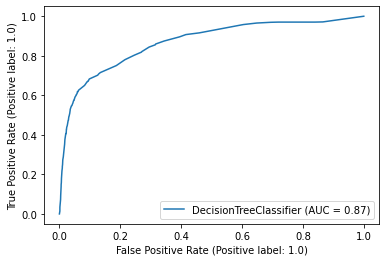

In [31]:
plot_roc_curve(tree_class_weighted, X_test, y_test);

Not bad, all things considered, but still thinking we could do better. Let's try some ensemble methods while we're at it!

## BaggingClassifier

In [32]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

In [33]:
bag_tree = BaggingClassifier(base_estimator=tree_class_weighted, n_estimators=30)
bag_tree.fit(X_train, y_train)

bag_preds = bag_tree.predict(X_test)

In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print(f'Weighted tree accuracy: {tree_class_weighted.score(X_test, y_test)}')
print(f'Bag tree accuracy: {bag_tree.score(X_test, y_test)}')

Weighted tree accuracy: 0.8800227985180963
Bag tree accuracy: 0.8830626009309395


In [35]:
print(f'Weighted tree precision: {precision_score(y_test, weighted_preds)}')
print(f'Bag tree precision: {precision_score(y_test, bag_preds)}')

Weighted tree precision: 0.4340425531914894
Bag tree precision: 0.442151344590369


In [36]:
print(f'Weighted tree recall: {recall_score(y_test, weighted_preds)}')
print(f'Bag tree recall: {recall_score(y_test, bag_preds)}')

Weighted tree recall: 0.6826003824091779
Bag tree recall: 0.6759082217973231


In [37]:
print(f'Weighted tree F1: {f1_score(y_test, weighted_preds)}')
print(f'Bag tree F1: {f1_score(y_test, bag_preds)}')

Weighted tree F1: 0.5306577480490524
Bag tree F1: 0.534593572778828


## Random Forest

In [38]:
# Create Tree
Rf_cl = RandomForestClassifier(class_weight='balanced', max_depth=10)

In [39]:
Rf_cl.fit(X_train, y_train)
Rf_preds = Rf_cl.predict(X_test)
print(classification_report(y_test, Rf_preds))

              precision    recall  f1-score   support

         0.0       0.96      0.91      0.93      9481
         1.0       0.44      0.68      0.53      1046

    accuracy                           0.88     10527
   macro avg       0.70      0.79      0.73     10527
weighted avg       0.91      0.88      0.89     10527



## ADABOOST

In [40]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier()
ada_clf.fit(X_train, y_train)
ada_preds = ada_clf.predict(X_test)
print(classification_report(y_test, ada_preds))

              precision    recall  f1-score   support

         0.0       0.94      0.98      0.96      9481
         1.0       0.67      0.41      0.51      1046

    accuracy                           0.92     10527
   macro avg       0.80      0.69      0.73     10527
weighted avg       0.91      0.92      0.91     10527



## Gradient Boost

In [41]:
from sklearn.ensemble import GradientBoostingClassifier
grad_clf = GradientBoostingClassifier()

grad_clf.fit(X_train, y_train)
grad_preds = grad_clf.predict(X_test)
print(classification_report(y_test, grad_preds))

              precision    recall  f1-score   support

         0.0       0.94      0.97      0.96      9481
         1.0       0.64      0.49      0.55      1046

    accuracy                           0.92     10527
   macro avg       0.79      0.73      0.76     10527
weighted avg       0.91      0.92      0.92     10527



XGBoostError: 
XGBoost Library (libxgboost.dylib) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed
    - vcomp140.dll or libgomp-1.dll for Windows
    - libomp.dylib for Mac OSX
    - libgomp.so for Linux and other UNIX-like OSes
    Mac OSX users: Run `brew install libomp` to install OpenMP runtime.

  * You are running 32-bit Python on a 64-bit OS

Error message(s): ['dlopen(/Users/matthewturner/opt/anaconda3/lib/python3.8/site-packages/xgboost/lib/libxgboost.dylib, 6): Library not loaded: /usr/local/opt/libomp/lib/libomp.dylib\n  Referenced from: /Users/matthewturner/opt/anaconda3/lib/python3.8/site-packages/xgboost/lib/libxgboost.dylib\n  Reason: image not found']
